# Numpy의 polyfit으로 회귀(regression) 분석하기

 - pandas_datareader & fbprophet 설치
 - fbprophet 설치가 안되서 3일정도 시간을 버림.. 원인을 찾기 위해..;;
   해결함... 파이썬 버전 문제인듯.. 3.7에서는 안됨.. 3.6에서 설치하니 작동됨.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from datetime import datetime
from fbprophet import Prophet

In [2]:
path ="c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
pinkwink_web= pd.read_csv('c://BigData/DataScience/data/08. PinkWink Web Traffic.csv', encoding='utf-8',
                         thousands=',' , names=['date','hit'], index_col=0)
pinkwink_web= pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


 - 필자님 블로그 트래픽 관련 

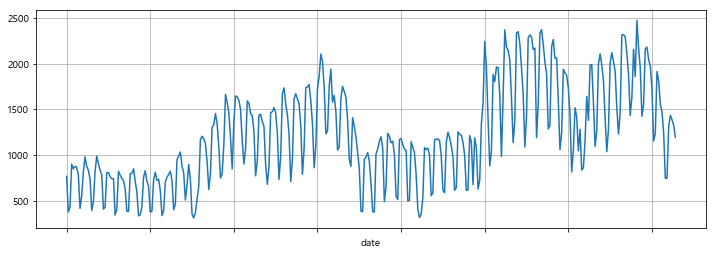

In [5]:
pinkwink_web['hit'].plot(figsize=(12,4),grid=True)

In [6]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [10]:
def error(f,x,y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [11]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time, traffic, 2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, traffic, 3)
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp15)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


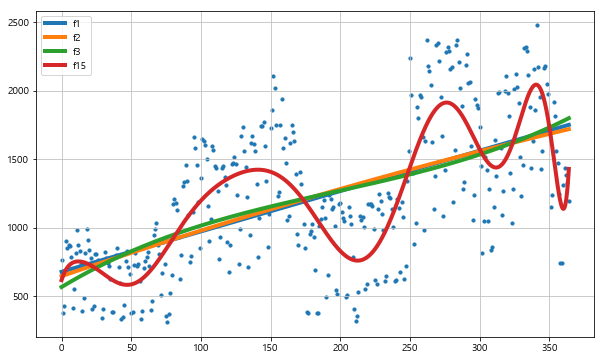

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

# Prophet 모듈을 이용한 forecast 예측

In [15]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format = "%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [16]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,911.790860,703.552508,1112.015139
421,2017-08-26,496.917939,289.716375,704.636080
422,2017-08-27,629.458439,429.550482,824.021073
423,2017-08-28,1181.938386,969.648948,1401.036541
424,2017-08-29,1217.864960,998.810813,1424.962170


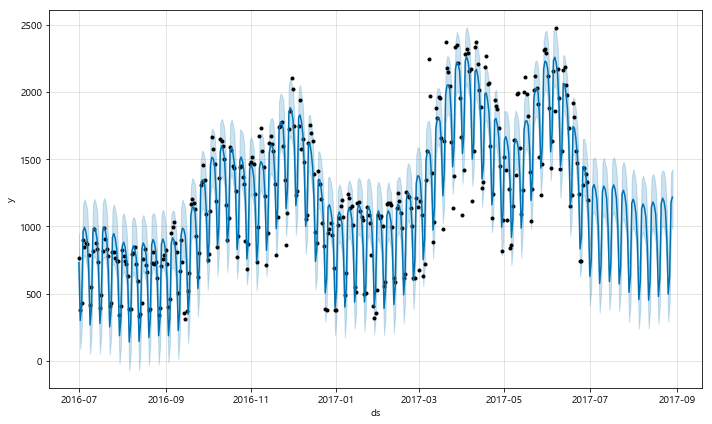

In [19]:
m.plot(forecast);

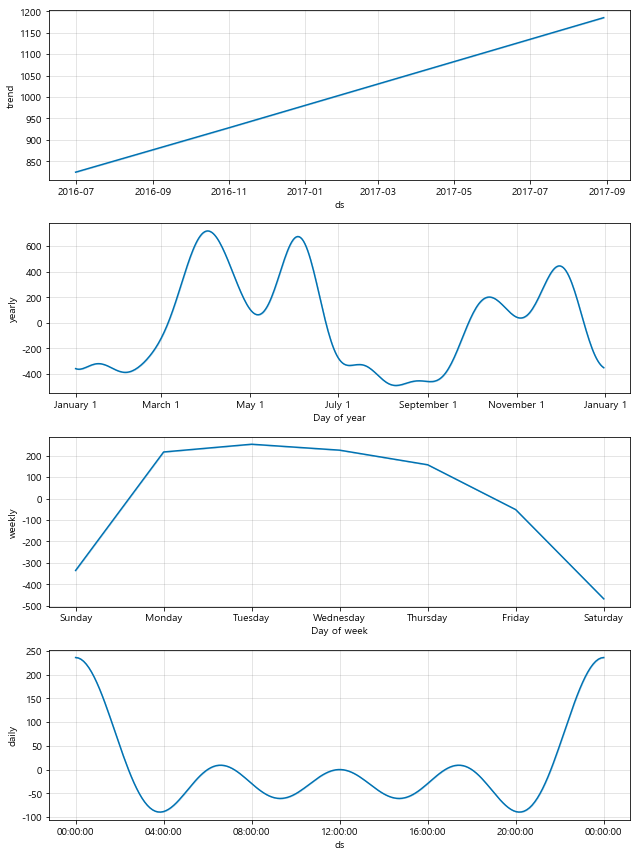

In [20]:
m.plot_components(forecast);

#  Seasonal 시계열 분석으로 주식 데이터 분석하기

In [22]:
from pandas_datareader import data
import fix_yahoo_finance as yf

start_date = '1990-1-1'
end_date = '2017-6-30'
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)

KIA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,7665.240234,7300.229980,7404.520020,7665.240234,636300.0,5963.754395
2000-01-05,7404.520020,7248.089844,7404.520020,7248.089844,686100.0,5639.200684
2000-01-06,7519.240234,6935.220215,7331.520020,6935.220215,379000.0,5395.779297
2000-01-07,7143.799805,6778.790039,6987.359863,6778.790039,701400.0,5274.072754
2000-01-10,7102.080078,6810.069824,6841.359863,7091.649902,1076700.0,5517.486816


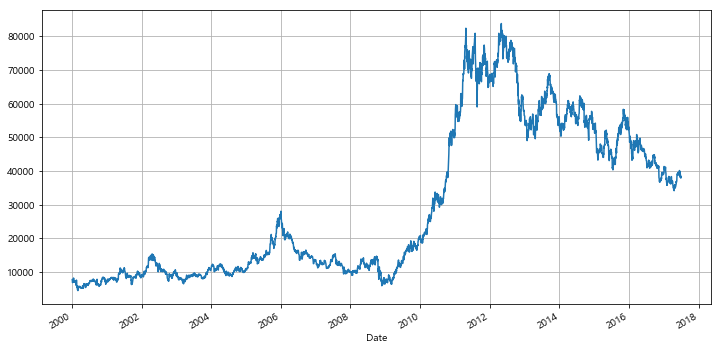

In [23]:
KIA['Close'].plot(figsize=(12,6), grid=TruTrue

In [24]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,7665.240234,7300.229980,7404.520020,7665.240234,636300.0,5963.754395
2000-01-05,7404.520020,7248.089844,7404.520020,7248.089844,686100.0,5639.200684
2000-01-06,7519.240234,6935.220215,7331.520020,6935.220215,379000.0,5395.779297
2000-01-07,7143.799805,6778.790039,6987.359863,6778.790039,701400.0,5274.072754
2000-01-10,7102.080078,6810.069824,6841.359863,7091.649902,1076700.0,5517.486816
2000-01-11,7717.390137,7143.799805,7143.799805,7717.390137,1127200.0,6004.329590
2000-01-12,8447.410156,7300.229980,7717.390137,7508.810059,1606600.0,5842.046875
2000-01-13,7696.529785,7195.939941,7696.529785,7195.939941,702700.0,5598.626953
2000-01-14,7508.810059,6987.359863,7195.939941,7508.810059,843900.0,5842.046875


In [26]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.240234
1,2000-01-05,7248.089844
2,2000-01-06,6935.220215
3,2000-01-07,6778.790039
4,2000-01-10,7091.649902


In [28]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [29]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4578,2017-12-25
4579,2017-12-26
4580,2017-12-27
4581,2017-12-28
4582,2017-12-29


In [30]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4578,2017-12-25,35755.238273,27098.561264,45596.139120
4579,2017-12-26,35800.435107,27284.761592,45731.172203
4580,2017-12-27,35769.118927,27055.390675,44757.012683
4581,2017-12-28,35734.380073,27588.404897,44785.408980
4582,2017-12-29,35671.333866,26654.291048,45226.155604


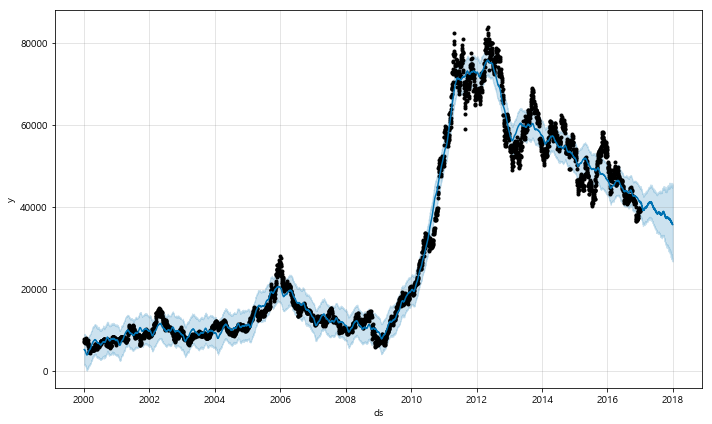

In [31]:
m.plot(forecast);

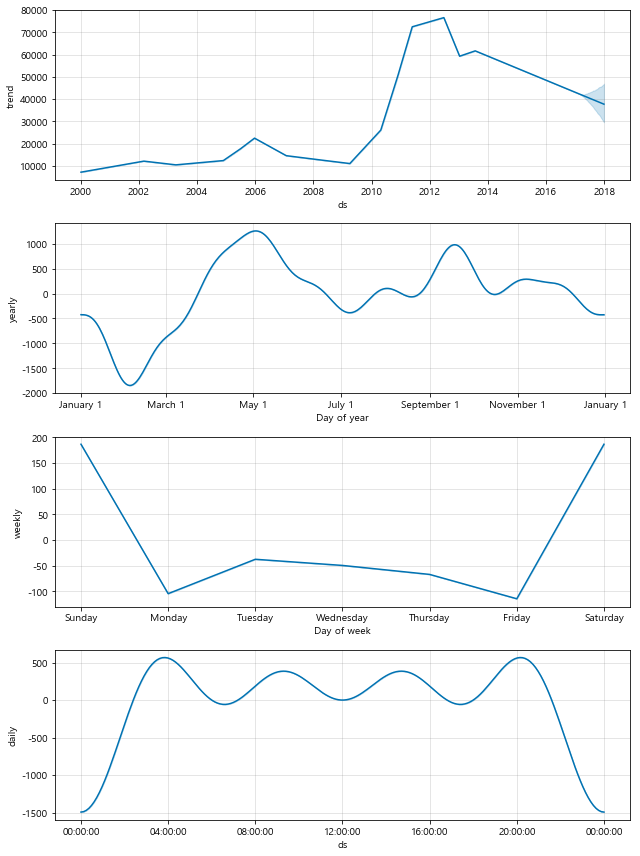

In [33]:
m.plot_components(forecast);

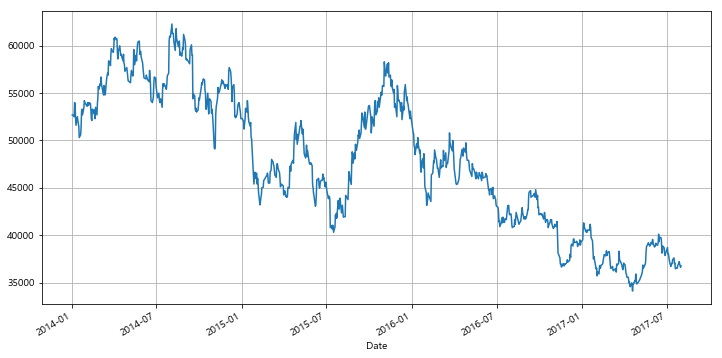

In [37]:
start_date = '2014-1-1'
end_date = '2017-7-31'
KIA = data.get_data_yahoo('000270.KS', start_date,end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

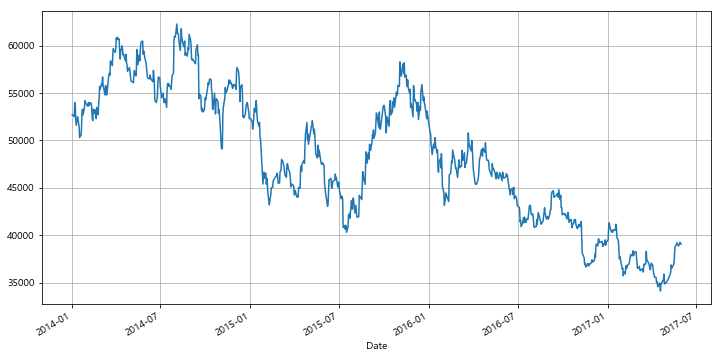

In [38]:
KIA_trunc = KIA[:'2017-5-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True)

In [40]:
df = pd.DataFrame({'ds':KIA_trunc.index,'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']


In [42]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [43]:
future=m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


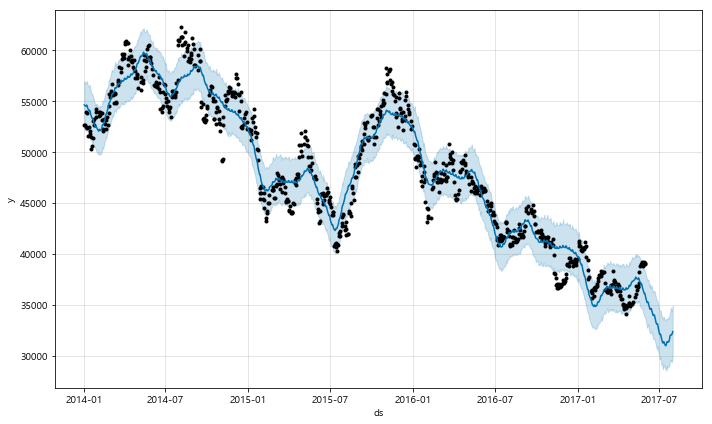

In [44]:
forecast = m.predict(future)
m.plot(forecast);

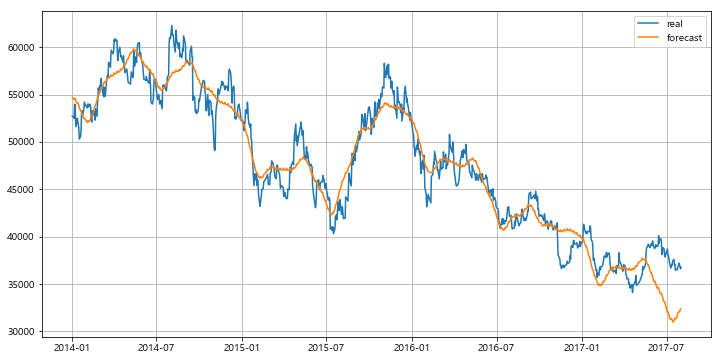

In [46]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'],label='real')
plt.plot(forecast['ds'],forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()